In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [37]:
dataset = pd.read_csv('/content/dataset.csv')

In [38]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The scale of each feature column is different and quite varied as well. While the maximum for `age` reaches 77, the maximum of `chol` (serum cholestoral) is 564.

### Understanding the data

Now, we can use visualizations to better understand our data and then look at any processing we might want to do.

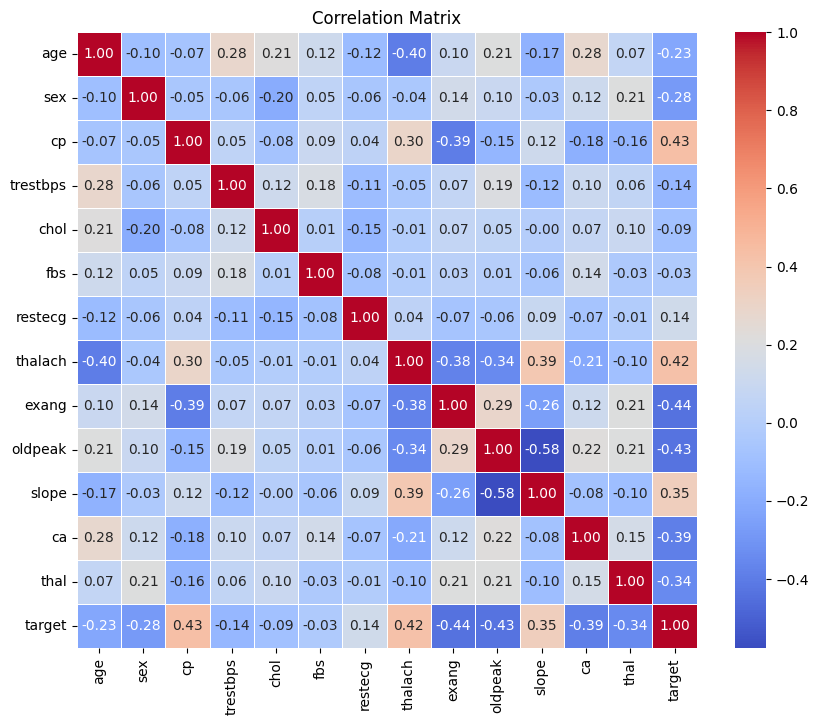

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already imported dataset and assigned it the appropriate value

# Compute the correlation matrix
correlation_matrix = dataset.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix')
plt.show()


Text(0.5, 1.0, 'Count of each Target Class')

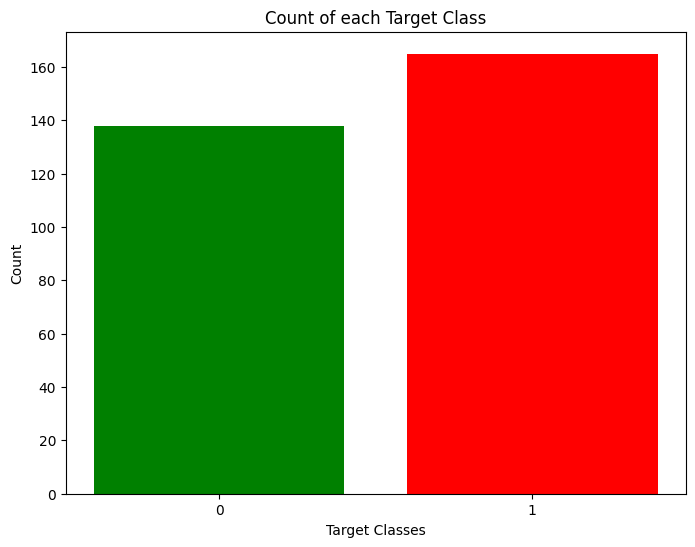

In [40]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

The two classes are not exactly 50% each but the ratio is good enough to continue without dropping/increasing our data.

### Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [41]:
dataset = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

Now, I will use the `StandardScaler` from `sklearn` to scale my dataset.

In [42]:
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [43]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

#### K Neighbors Classifier

The classification score varies based on different values of neighbors that we choose. Thus, I'll plot a score graph for different values of K (neighbors) and check when do I achieve the best score.

Maximum Accuracy: 0.87 at K=8
Maximum Precision: 0.8913043478260869 at K=4
Maximum F1 Score: 0.8737864077669903 at K=8


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

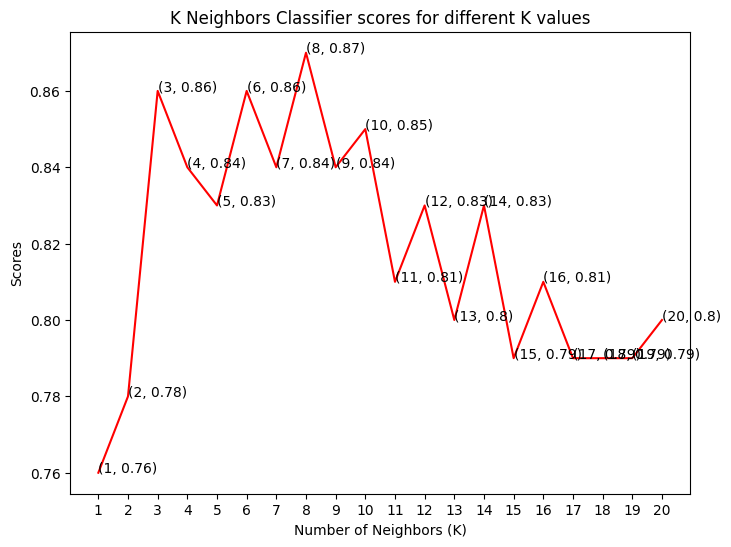

In [44]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Assuming you have already loaded the dataset and split it into X_train, X_test, y_train, y_test

# Initialize lists to store scores
knn_scores = []
accuracies = []
precisions = []
f1_scores = []

# Initialize variables to store maximum values and corresponding K
max_accuracy = 0
max_precision = 0
max_f1_score = 0
best_k_accuracy = None
best_k_precision = None
best_k_f1_score = None

# Train KNN classifier for different values of K
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

    # Make predictions on the test set
    y_pred = knn_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Calculate precision
    precision = precision_score(y_test, y_pred)
    precisions.append(precision)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Update maximum values and corresponding K
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_k_accuracy = k
    if precision > max_precision:
        max_precision = precision
        best_k_precision = k
    if f1 > max_f1_score:
        max_f1_score = f1
        best_k_f1_score = k

# Print maximum values and corresponding K
print(f"Maximum Accuracy: {max_accuracy} at K={best_k_accuracy}")
print(f"Maximum Precision: {max_precision} at K={best_k_precision}")
print(f"Maximum F1 Score: {max_f1_score} at K={best_k_f1_score}")



# Plot accuracy, precision, and F1 score
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [45]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[7]*100, 8))

The score for K Neighbors Classifier is 87.0% with 8 nieghbors.


#### Support Vector Classifier

There are several kernels for Support Vector Classifier. I'll test some of them and check which has the best score.

Maximum Accuracy: 0.83 for kernel 'linear'
Maximum Precision: 0.84 for kernel 'poly'
Maximum F1 Score: 0.8380952380952382 for kernel 'linear'


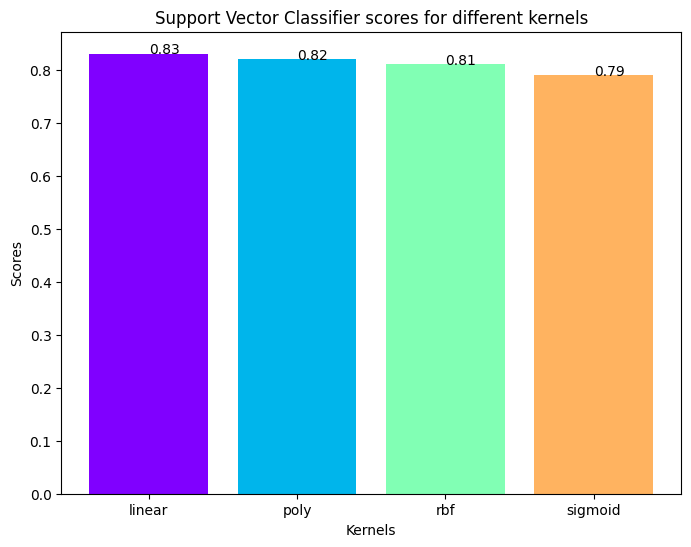

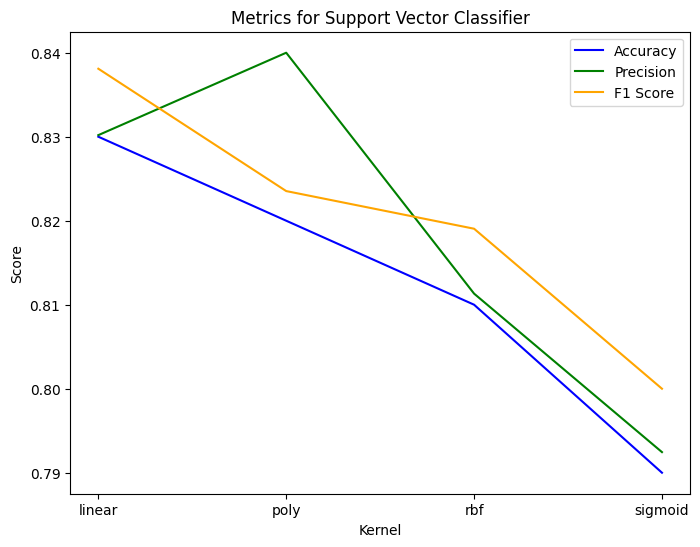

In [46]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Assuming you have already loaded the dataset and split it into X_train, X_test, y_train, y_test

# Initialize lists to store scores
svc_scores = []
accuracies = []
precisions = []
f1_scores = []

# Define kernel types
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Initialize variables to store maximum values and corresponding kernel type
max_accuracy = 0
max_precision = 0
max_f1_score = 0
best_kernel_accuracy = None
best_kernel_precision = None
best_kernel_f1_score = None

# Train SVC classifier for different kernel types
for kernel in kernels:
    svc_classifier = SVC(kernel=kernel)
    svc_classifier.fit(X_train, y_train)
    score = svc_classifier.score(X_test, y_test)
    svc_scores.append(score)

    # Make predictions on the test set
    y_pred = svc_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Calculate precision
    precision = precision_score(y_test, y_pred)
    precisions.append(precision)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Update maximum values and corresponding kernel type
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_kernel_accuracy = kernel
    if precision > max_precision:
        max_precision = precision
        best_kernel_precision = kernel
    if f1 > max_f1_score:
        max_f1_score = f1
        best_kernel_f1_score = kernel

# Print maximum values and corresponding kernel type
print(f"Maximum Accuracy: {max_accuracy} for kernel '{best_kernel_accuracy}'")
print(f"Maximum Precision: {max_precision} for kernel '{best_kernel_precision}'")
print(f"Maximum F1 Score: {max_f1_score} for kernel '{best_kernel_f1_score}'")

# Plot SVC scores
plt.bar(kernels, svc_scores, color=colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
plt.show()

# Plot accuracy, precision, and F1 score
plt.plot(kernels, accuracies, color='blue', label='Accuracy')
plt.plot(kernels, precisions, color='green', label='Precision')
plt.plot(kernels, f1_scores, color='orange', label='F1 Score')
plt.xlabel('Kernel')
plt.ylabel('Score')
plt.title('Metrics for Support Vector Classifier')
plt.legend()
plt.show()


In [47]:
print("The score for Support Vector Classifier is {}% with {} kernel.".format(svc_scores[0]*100, 'linear'))

The score for Support Vector Classifier is 83.0% with linear kernel.


#### Decision Tree Classifier

Here, I'll use the Decision Tree Classifier to model the problem at hand. I'll vary between a set of `max_features` and see which returns the best accuracy.

Maximum Accuracy: 0.79 for 2 maximum features
Maximum Precision: 0.8974358974358975 for 2 maximum features
Maximum F1 Score: 0.8108108108108109 for 4 maximum features


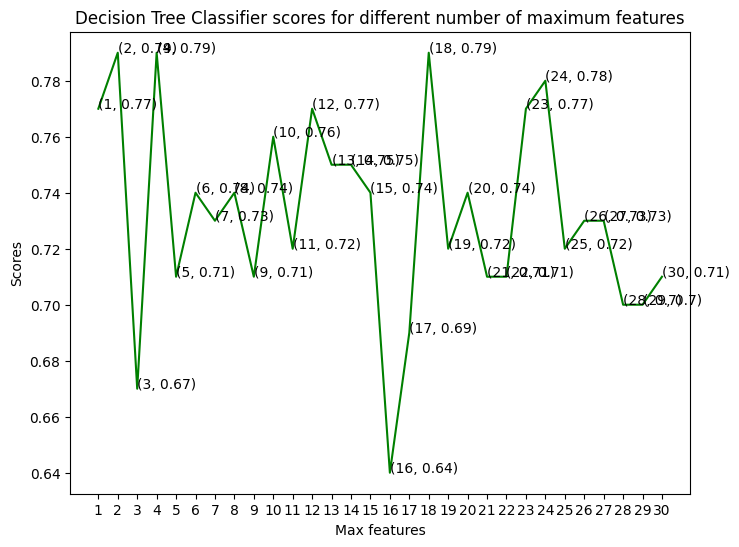

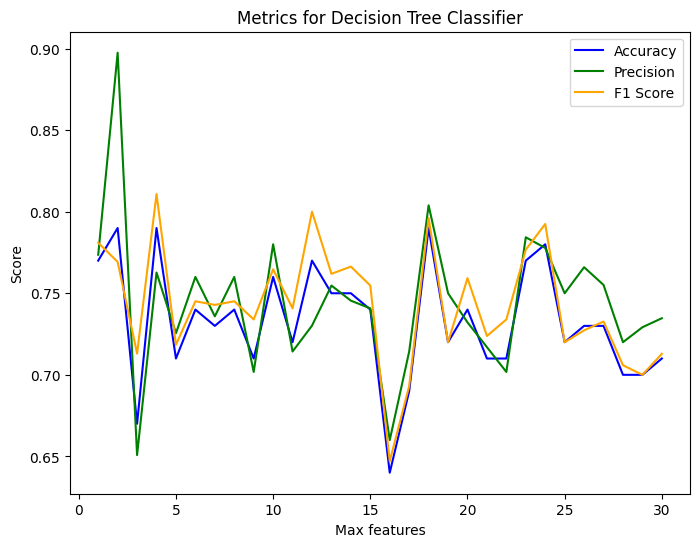

In [48]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Assuming you have already loaded the dataset and split it into X_train, X_test, y_train, y_test

# Initialize lists to store scores
dt_scores = []
accuracies = []
precisions = []
f1_scores = []

# Initialize variables to store maximum values and corresponding number of maximum features
max_accuracy = 0
max_precision = 0
max_f1_score = 0
best_max_features_accuracy = None
best_max_features_precision = None
best_max_features_f1_score = None

# Train Decision Tree classifier for different number of maximum features
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features=i, random_state=0)
    dt_classifier.fit(X_train, y_train)
    score = dt_classifier.score(X_test, y_test)
    dt_scores.append(score)

    # Make predictions on the test set
    y_pred = dt_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Calculate precision
    precision = precision_score(y_test, y_pred)
    precisions.append(precision)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Update maximum values and corresponding number of maximum features
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_max_features_accuracy = i
    if precision > max_precision:
        max_precision = precision
        best_max_features_precision = i
    if f1 > max_f1_score:
        max_f1_score = f1
        best_max_features_f1_score = i

# Print maximum values and corresponding number of maximum features
print(f"Maximum Accuracy: {max_accuracy} for {best_max_features_accuracy} maximum features")
print(f"Maximum Precision: {max_precision} for {best_max_features_precision} maximum features")
print(f"Maximum F1 Score: {max_f1_score} for {best_max_features_f1_score} maximum features")

# Plot Decision Tree scores
plt.plot(range(1, len(X.columns) + 1), dt_scores, color='green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks(range(1, len(X.columns) + 1))
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')
plt.show()

# Plot accuracy, precision, and F1 score
plt.plot(range(1, len(X.columns) + 1), accuracies, color='blue', label='Accuracy')
plt.plot(range(1, len(X.columns) + 1), precisions, color='green', label='Precision')
plt.plot(range(1, len(X.columns) + 1), f1_scores, color='orange', label='F1 Score')
plt.xlabel('Max features')
plt.ylabel('Score')
plt.title('Metrics for Decision Tree Classifier')
plt.legend()
plt.show()


In [49]:
print("The score for Decision Tree Classifier is {}% with {} maximum features.".format(dt_scores[17]*100, [2,4,18]))

The score for Decision Tree Classifier is 79.0% with [2, 4, 18] maximum features.


#### Random Forest Classifier

Now, I'll use the ensemble method, Random Forest Classifier, to create the model and vary the number of estimators to see their effect.

Maximum Accuracy: 0.84 for 100 estimators
Maximum Precision: 0.86 for 100 estimators
Maximum F1 Score: 0.8490566037735849 for 500 estimators


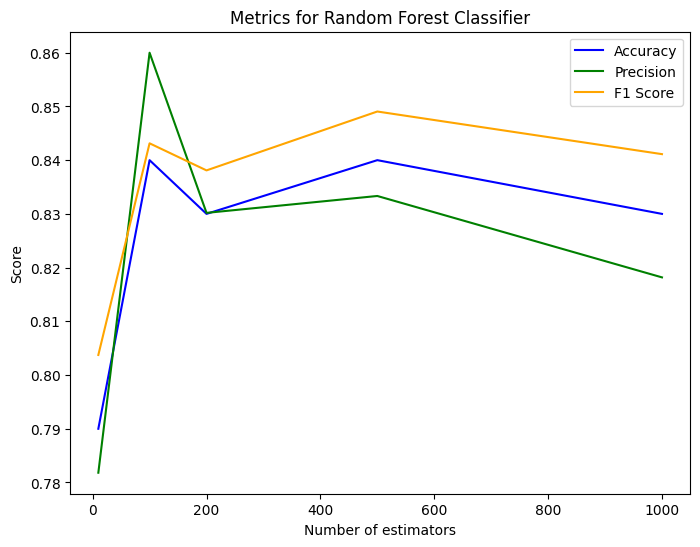

In [50]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Assuming you have already loaded the dataset and split it into X_train, X_test, y_train, y_test

# Initialize lists to store scores
rf_scores = []
accuracies = []
precisions = []
f1_scores = []

# Define different numbers of estimators
estimators = [10, 100, 200, 500, 1000]

# Initialize variables to store maximum values and corresponding number of estimators
max_accuracy = 0
max_precision = 0
max_f1_score = 0
best_estimator_accuracy = None
best_estimator_precision = None
best_estimator_f1_score = None

# Train Random Forest classifier for different numbers of estimators
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=i, random_state=0)
    rf_classifier.fit(X_train, y_train)
    score = rf_classifier.score(X_test, y_test)
    rf_scores.append(score)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Calculate precision
    precision = precision_score(y_test, y_pred)
    precisions.append(precision)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

    # Update maximum values and corresponding number of estimators
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_estimator_accuracy = i
    if precision > max_precision:
        max_precision = precision
        best_estimator_precision = i
    if f1 > max_f1_score:
        max_f1_score = f1
        best_estimator_f1_score = i

# Print maximum values and corresponding number of estimators
print(f"Maximum Accuracy: {max_accuracy} for {best_estimator_accuracy} estimators")
print(f"Maximum Precision: {max_precision} for {best_estimator_precision} estimators")
print(f"Maximum F1 Score: {max_f1_score} for {best_estimator_f1_score} estimators")



# Plot accuracy, precision, and F1 score
plt.plot(estimators, accuracies, color='blue', label='Accuracy')
plt.plot(estimators, precisions, color='green', label='Precision')
plt.plot(estimators, f1_scores, color='orange', label='F1 Score')
plt.xlabel('Number of estimators')
plt.ylabel('Score')
plt.title('Metrics for Random Forest Classifier')
plt.legend()
plt.show()


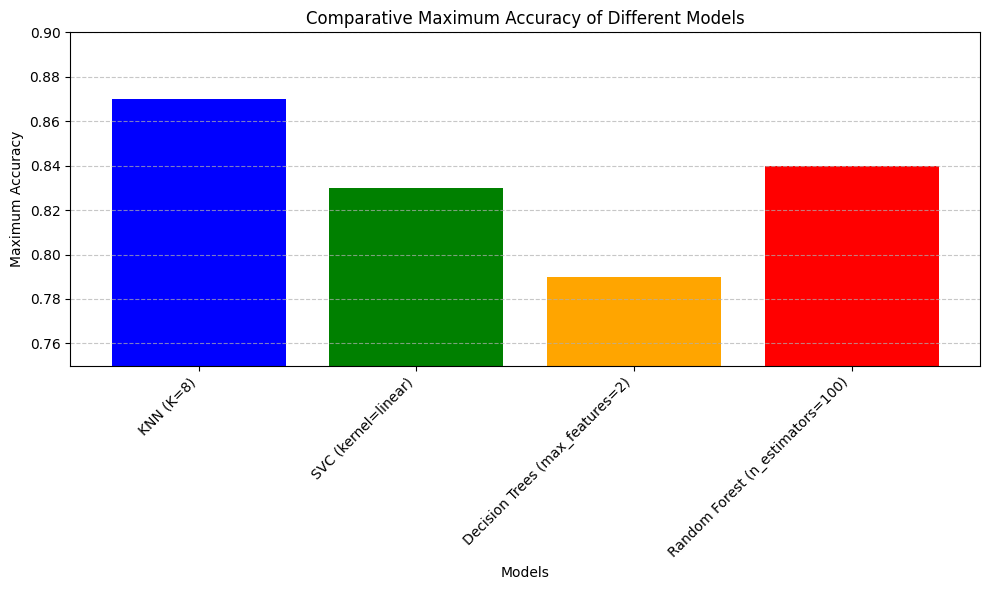

In [51]:
import matplotlib.pyplot as plt

# Maximum accuracies and their corresponding configurations
max_accuracies = [0.87, 0.83, 0.79, 0.84]
models = ['KNN (K=8)', 'SVC (kernel=linear)', 'Decision Trees (max_features=2)', 'Random Forest (n_estimators=100)']

# Plotting the comparative graph
plt.figure(figsize=(10, 6))
plt.bar(models, max_accuracies, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Models')
plt.ylabel('Maximum Accuracy')
plt.title('Comparative Maximum Accuracy of Different Models')
plt.ylim(0.75, 0.9)  # Adjust y-axis limit if needed
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

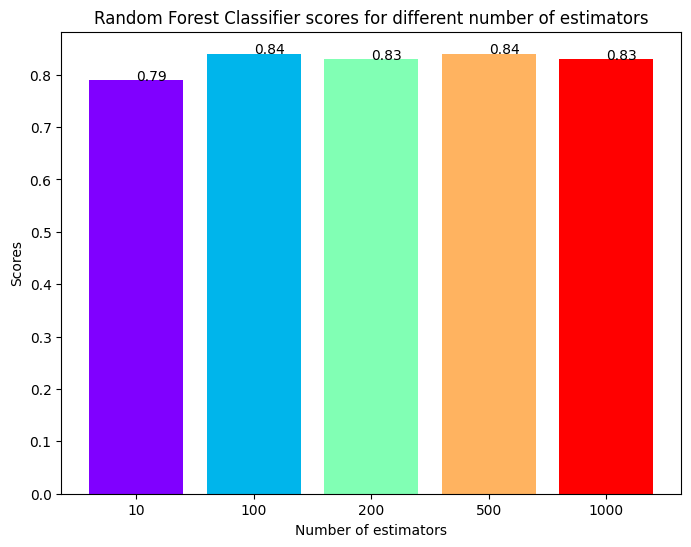

In [52]:
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

The maximum score is achieved when the total estimators are 100 or 500.

In [53]:
print("The score for Random Forest Classifier is {}% with {} estimators.".format(rf_scores[1]*100, [100, 500]))

The score for Random Forest Classifier is 84.0% with [100, 500] estimators.
